In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
 ! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [ ]:
# Read movie data
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
# Check data distribution
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

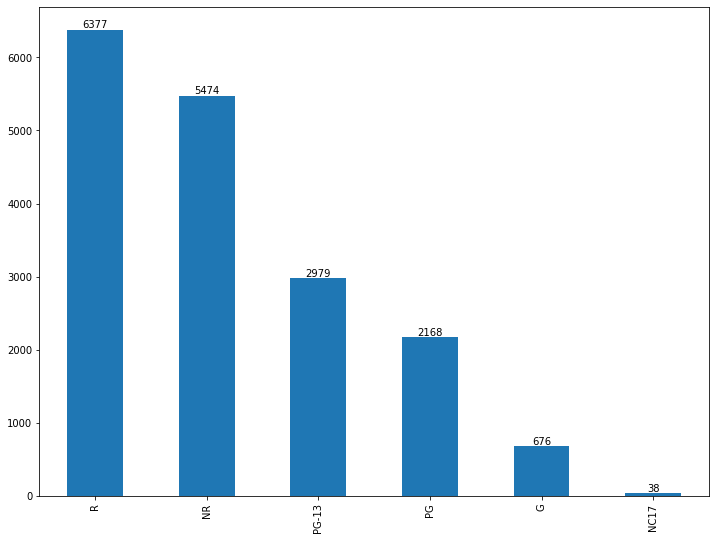

In [ ]:
# Data preprocessing I: content_rating feature
print(f'Content Rating category: {df_movie.content_rating.unique()}')

# Visualize the distribution of each category in content_rating feature
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [ ]:
# One hot encoding content_rating feature
content_rating = pd.get_dummies(df_movie.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

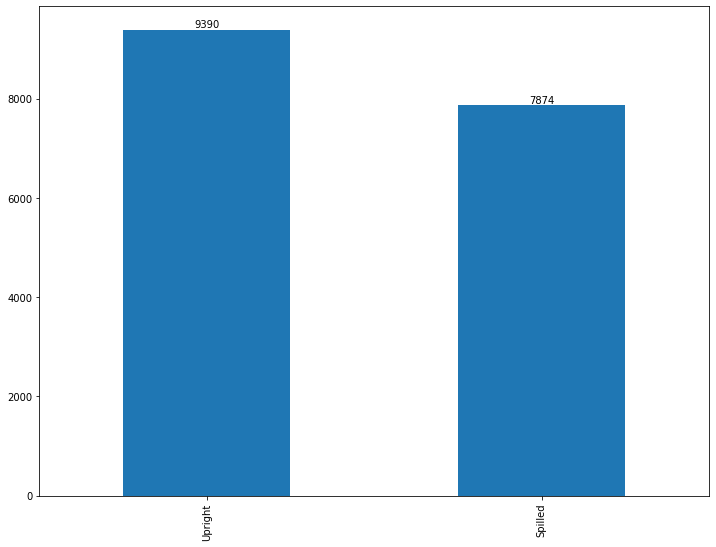

In [ ]:
# Data preprocessing II: audience_status feature
print(f'Audience status category: {df_movie.audience_status.unique()}')

# Visualize the distribution of each category
ax = df_movie.audience_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [ ]:
# Encode audience status feature with ordinal encoding
audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [ ]:
# Data preprocessing III: tomatometer_status feature
# Encode tomatometer status feature with ordinal encoding
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [ ]:
# Combine all of the features together into one dataframe
df_feature = pd.concat([df_movie[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
                        , content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [ ]:
# Check the distribution of feature dataframe
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# Applying VIF on data to check multi-colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['features'] = df_feature.columns
vif_data['VIF'] = [variance_inflation_factor(df_feature.values,i) 
for i in range(len(df_feature.columns))]
vif_data

,features,VIF
0,runtime,1.139543
1,tomatometer_rating,4.069858
2,tomatometer_count,92803.446269
3,audience_rating,4.491585
4,audience_count,1.021390
5,tomatometer_top_critics_count,8.517575
6,tomatometer_fresh_critics_count,54773.798683
7,tomatometer_rotten_critics_count,18658.737908
8,G,2.790627
9,NC17,1.109593


In [ ]:
# combined all the highly multicolinear features 
df_PCA  = df_feature[['tomatometer_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]

Eigenvalues:
[2.28891760e+00 7.11252666e-01 6.03923849e-06]

Variances (Percentage):
[7.62927697e+01 2.37070290e+01 2.01296120e-04]



Text(0, 0.5, 'Explained variance (%)')

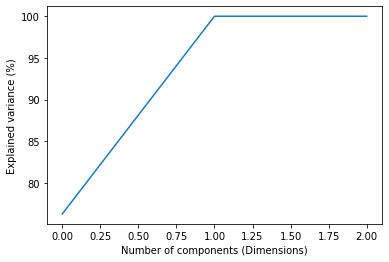

In [ ]:
#PCA to remove multicolinearity 

# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Tomato_ALLcounts = sc.fit_transform(df_PCA)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(Tomato_ALLcounts)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [ ]:
counts = Tomato_ALLcounts[:,0]

In [ ]:
counts

array([ 1.37553066,  1.27076003, -0.49537345, ..., -0.70491472,
       -0.51034069, -0.73484918])

In [ ]:
df_feature.drop(columns=df_PCA.columns,inplace=True)

In [ ]:
df_feature.columns

Index(['runtime', 'tomatometer_rating', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'G', 'NC17', 'NR', 'PG', 'PG-13', 'R',
       'audience_status', 'tomatometer_status'],
      dtype='object')

In [ ]:

df_feature['count_PCA'] = counts

array([[<AxesSubplot: title={'center': 'runtime'}>,
        <AxesSubplot: title={'center': 'tomatometer_rating'}>,
        <AxesSubplot: title={'center': 'audience_rating'}>,
        <AxesSubplot: title={'center': 'audience_count'}>],
       [<AxesSubplot: title={'center': 'tomatometer_top_critics_count'}>,
        <AxesSubplot: title={'center': 'G'}>,
        <AxesSubplot: title={'center': 'NC17'}>,
        <AxesSubplot: title={'center': 'NR'}>],
       [<AxesSubplot: title={'center': 'PG'}>,
        <AxesSubplot: title={'center': 'PG-13'}>,
        <AxesSubplot: title={'center': 'R'}>,
        <AxesSubplot: title={'center': 'audience_status'}>],
       [<AxesSubplot: title={'center': 'tomatometer_status'}>,
        <AxesSubplot: title={'center': 'count_PCA'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

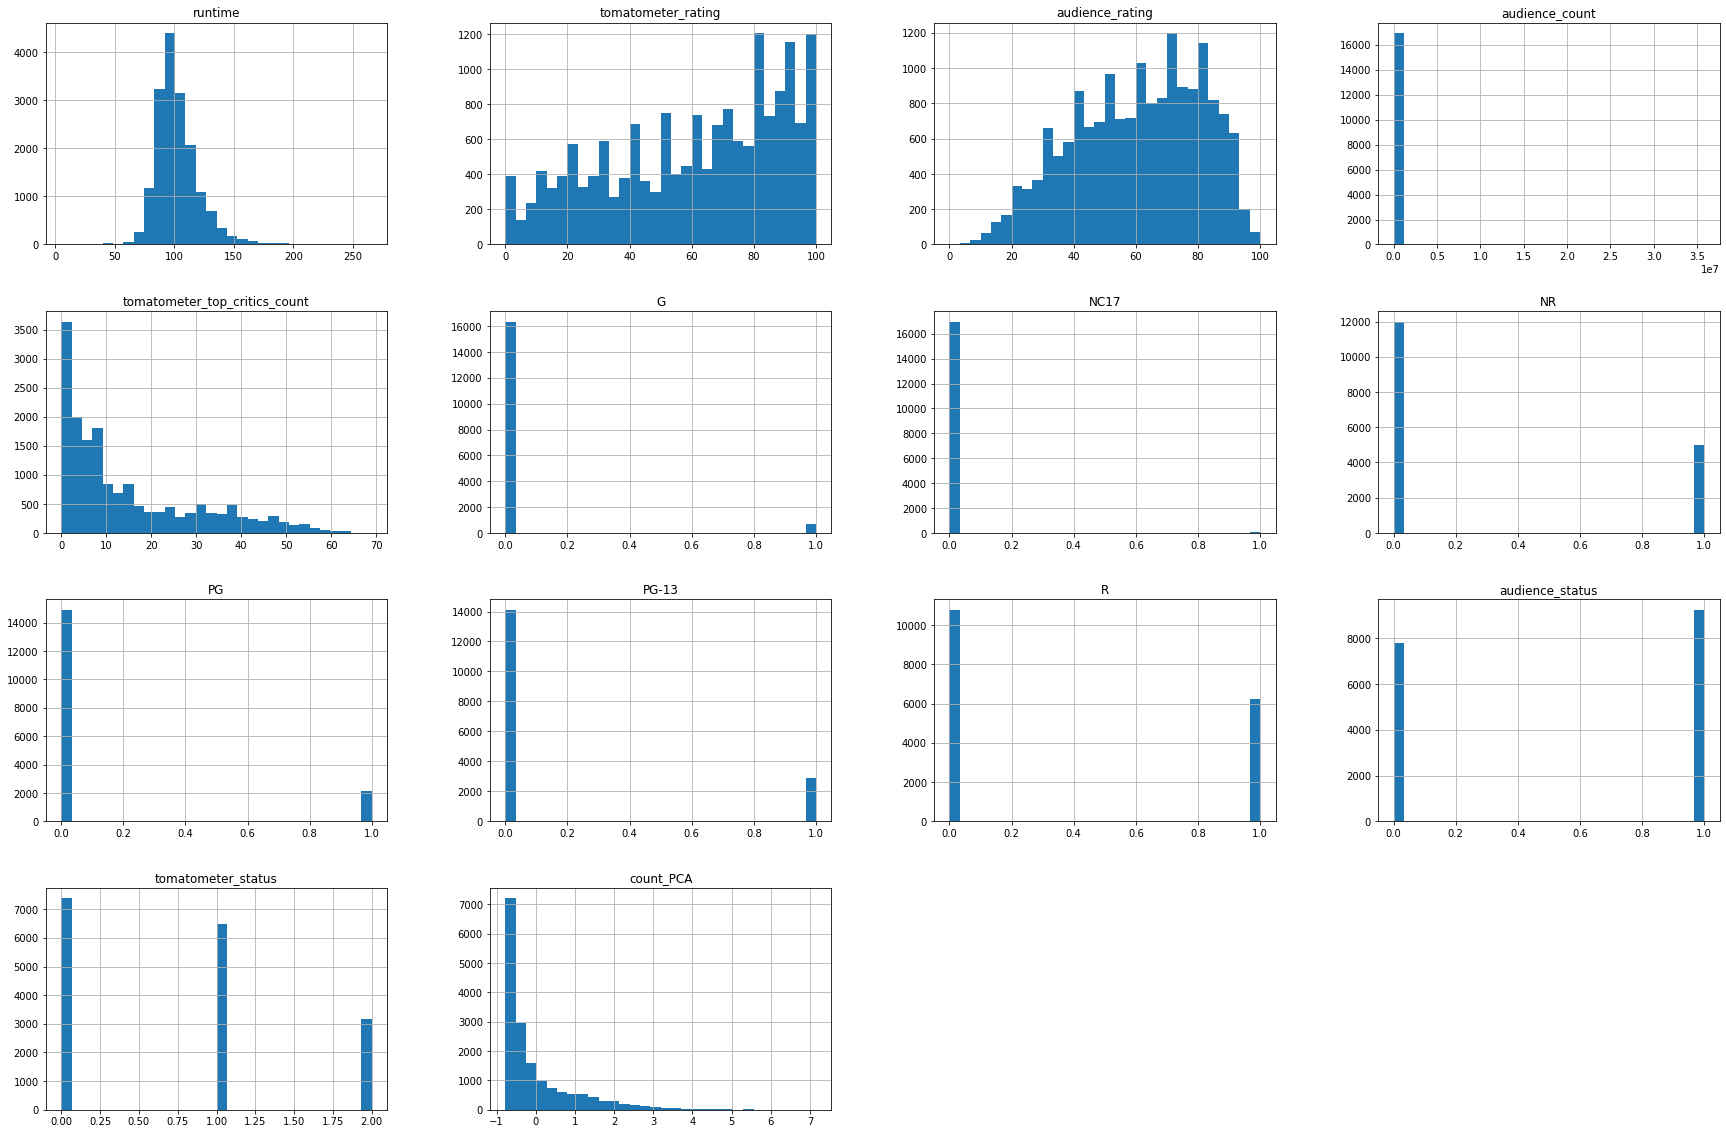

In [ ]:
df_feature.hist(bins =30 , figsize=(30,20))

In [ ]:
def convert_zero_to_one(x):
  if x<=0:
    return 1
  else:
    return x

df_feature['tomatometer_top_critics_count'] = df_feature['tomatometer_top_critics_count'].apply(convert_zero_to_one)
df_feature['count_PCA'] = df_feature['count_PCA'].apply(convert_zero_to_one)


In [ ]:
df_feature['count_PCA'] = np.log(df_feature['count_PCA'])
df_feature['tomatometer_top_critics_count'] = np.log(df_feature.tomatometer_top_critics_count)

In [ ]:
counts

array([ 1.37553066,  1.27076003, -0.49537345, ..., -0.70491472,
       -0.51034069, -0.73484918])

In [ ]:
df_feature

,runtime,tomatometer_rating,audience_rating,audience_count,tomatometer_top_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status,count_PCA
0,119.0,49.0,53.0,254421.0,3.761200,0,0,0,1,0,0,0.0,0.0,0.318840
1,90.0,87.0,64.0,11574.0,3.784190,0,0,0,0,0,1,1.0,2.0,0.239615
2,122.0,67.0,53.0,14684.0,0.693147,0,0,0,0,0,1,0.0,1.0,0.000000
3,95.0,100.0,97.0,105386.0,1.791759,0,0,1,0,0,0,1.0,2.0,0.000000
4,127.0,89.0,74.0,68918.0,1.609438,1,0,0,0,0,0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,104.0,56.0,74.0,1195.0,0.693147,0,0,0,0,0,1,1.0,0.0,0.000000
17708,108.0,98.0,92.0,101511.0,3.912023,0,0,0,1,0,0,1.0,2.0,1.253014
17709,142.0,80.0,86.0,7146.0,0.000000,0,0,1,0,0,0,1.0,1.0,0.000000
17710,135.0,96.0,91.0,30193.0,1.791759,0,0,0,1,0,0,1.0,1.0,0.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

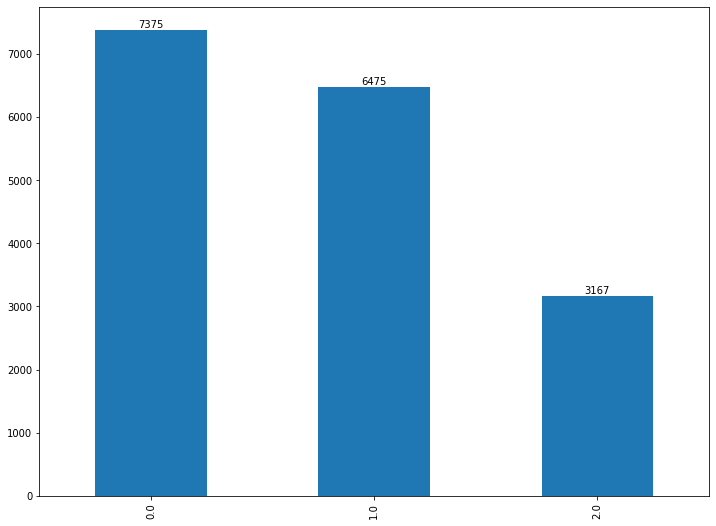

In [ ]:
# Check class distribution of our target variable:tomatometer_status  
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [ ]:
y= df_feature.tomatometer_status

In [ ]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7432432432432432
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1488
         1.0       0.62      0.89      0.73      1286
         2.0       0.67      0.01      0.02       630

    accuracy                           0.74      3404
   macro avg       0.73      0.61      0.55      3404
weighted avg       0.75      0.74      0.68      3404

0.4371327849588719
              precision    recall  f1-score   support

         0.0       0.44      1.00      0.61      1488
         1.0       0.00      0.00      0.00      1286
         2.0       0.00      0.00      0.00       630

    accuracy                           0.44      3404
   macro avg       0.15      0.33      0.20      3404
weighted avg       0.19      0.44      0.27      3404



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

0.9594594594594594
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.94      0.95      1286
         2.0       0.89      0.89      0.89       630

    accuracy                           0.96      3404
   macro avg       0.95      0.95      0.95      3404
weighted avg       0.96      0.96      0.96      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9697414806110458
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.89      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.95      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.40658049353701525
              precision    recall  f1-score   support

         0.0       0.53      0.05      0.09      1488
         1.0       0.41      0.94      0.57      1286
         2.0       0.32      0.15      0.20       630

    accuracy                           0.41      3404
   macro avg       0.42      0.38      0.29      3404
weighted avg       0.45      0.41      0.29      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9712103407755581
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.96      0.96      0.96      1286
         2.0       0.92      0.93      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.96      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9597532314923619
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1488
         1.0       0.94      0.96      0.95      1286
         2.0       0.93      0.87      0.90       630

    accuracy                           0.96      3404
   macro avg       0.95      0.94      0.95      3404
weighted avg       0.96      0.96      0.96      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


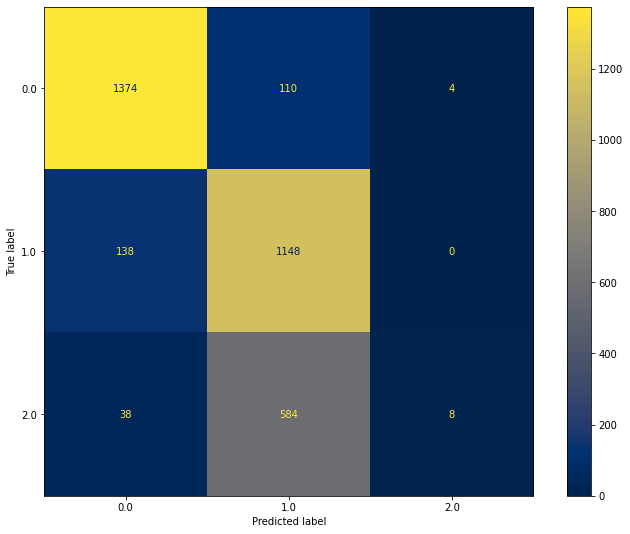

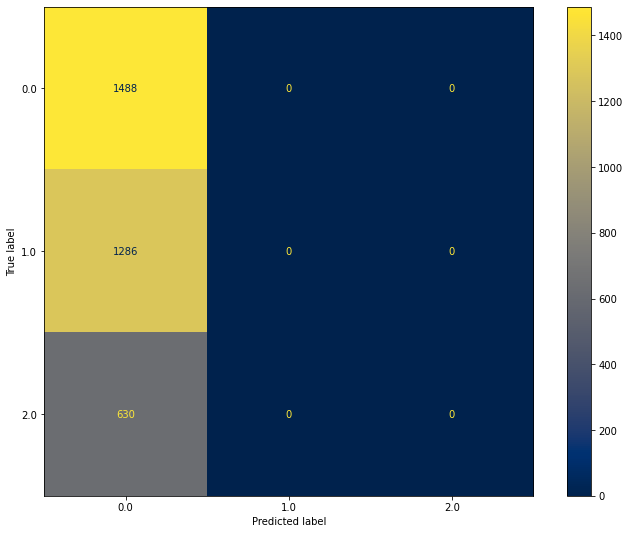

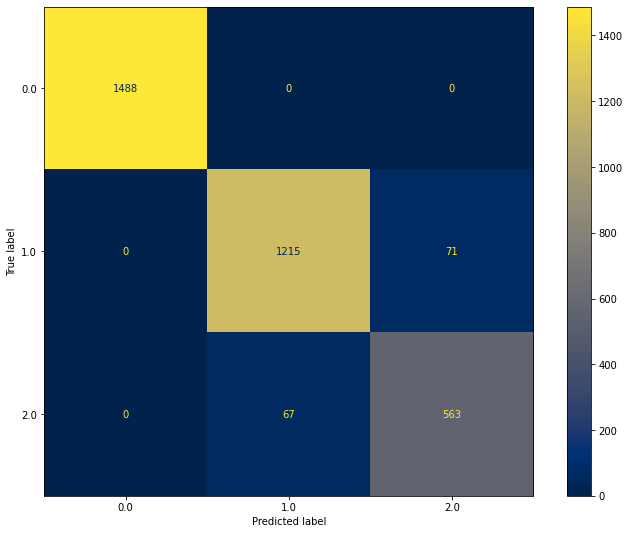

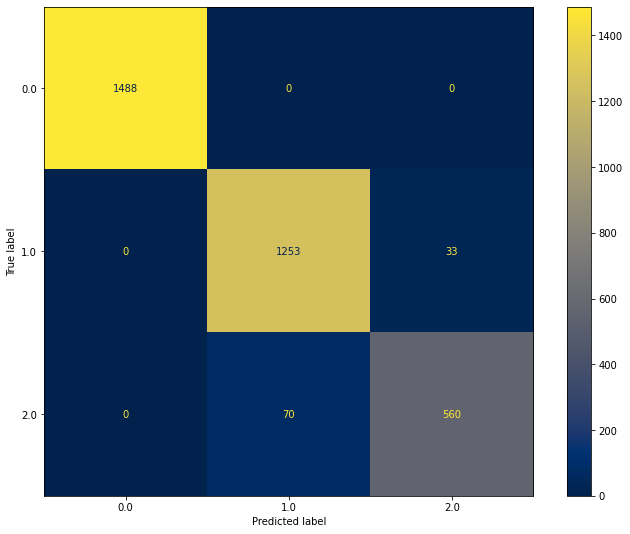

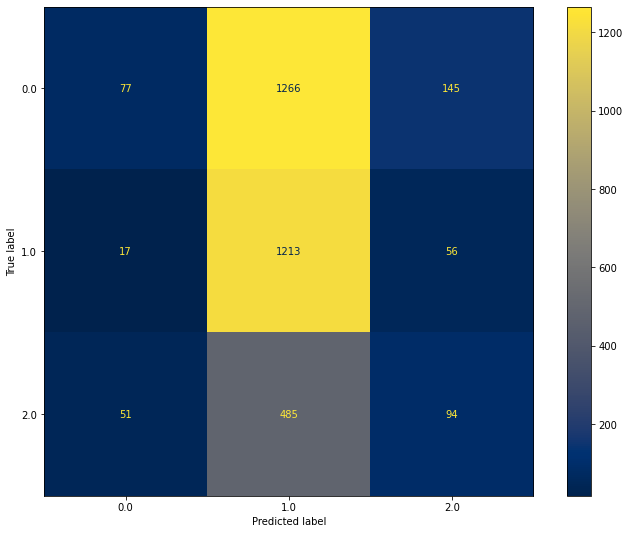

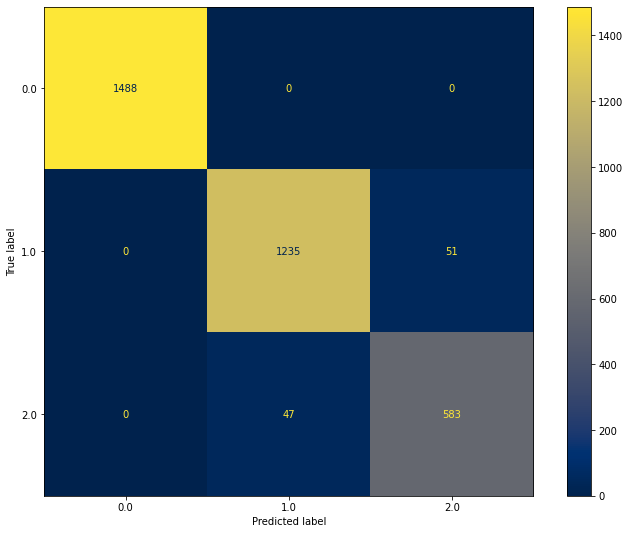

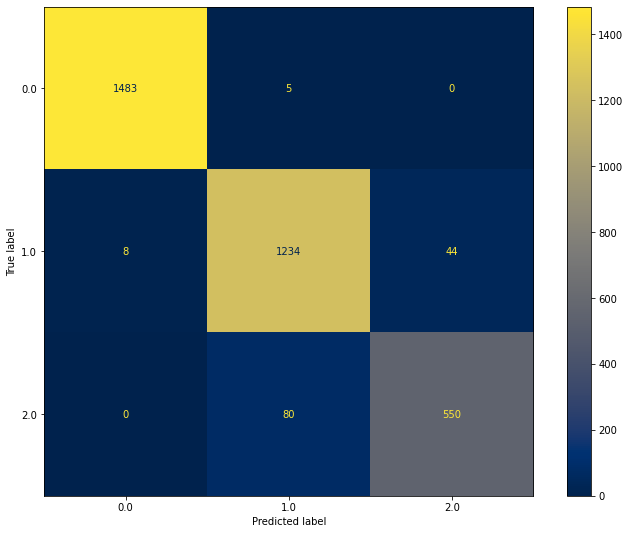

In [ ]:
from nltk.classify.weka import ClassifierI
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns


    
Classifiers = {
    'Logistic' : LogisticRegression(),
    'MLP': MLPClassifier(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced',kernel='rbf',probability=True),
    'GradientBoosting': GradientBoostingClassifier(random_state=42,learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
}



for model in Classifiers:
  # Train the model on the training data

  Classifiers[model].fit(X_train, y_train)


# Predict the test data with the trained model
  y_predict = Classifiers[model].predict(X_test)

#Print accuracy score and classification report
  print(accuracy_score(y_test, y_predict))
  print(classification_report(y_test, y_predict))
  
  fig, ax = plt.subplots(figsize=(12, 9))
  plot_confusion_matrix(Classifiers[model], X_test, y_test, cmap ='cividis', ax=ax)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


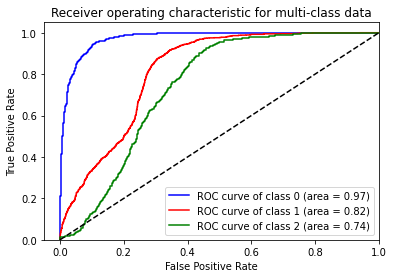

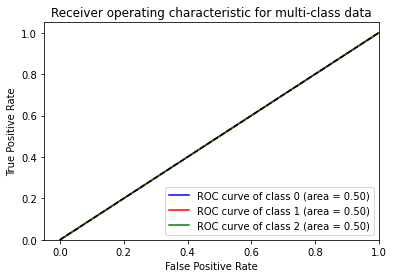

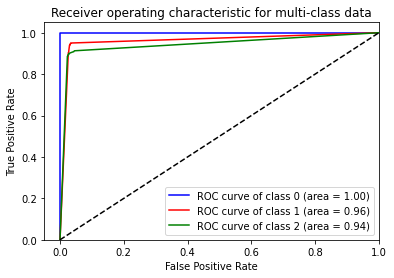

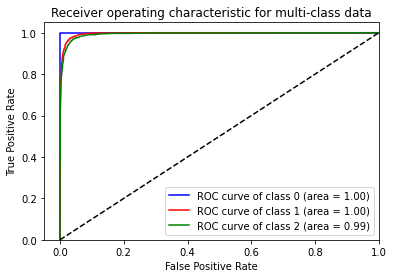

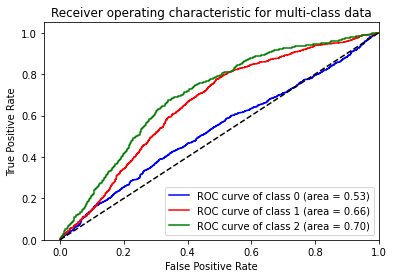

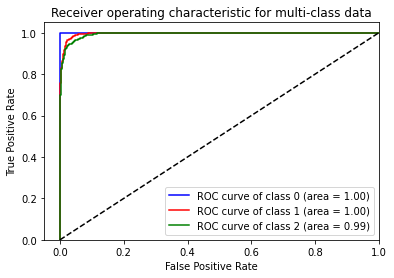

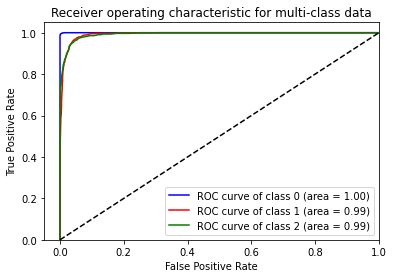

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

for model in Classifiers:

 y_score = Classifiers[model].fit(X_train, y_train).predict_proba(X_test)

 y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
 n_classes = y_test_bin.shape[1]



 fpr = dict()
 tpr = dict()
 roc_auc = dict()
 for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 colors = cycle(['blue', 'red', 'green'])
 for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([-0.05, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver operating characteristic for multi-class data')
 plt.legend(loc="lower right")
 plt.show()

0.8989424206815512
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.92      0.80      0.86      1286
         2.0       0.68      0.86      0.76       630

    accuracy                           0.90      3404
   macro avg       0.87      0.89      0.87      3404
weighted avg       0.91      0.90      0.90      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


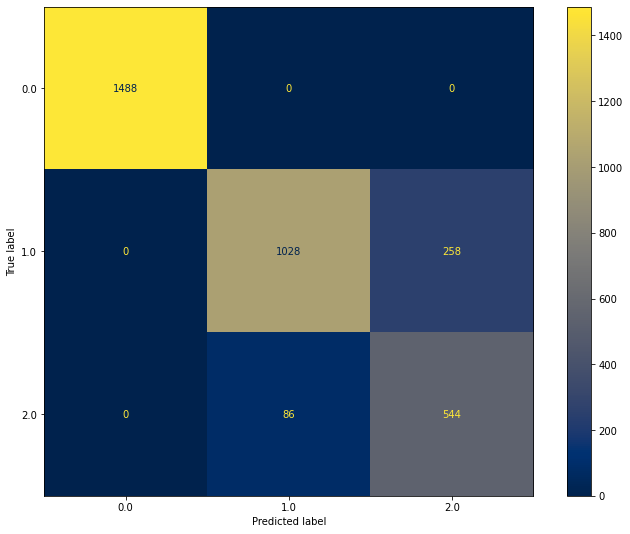

In [ ]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree_3_leaf, X_test, y_test, cmap ='cividis', ax=ax)

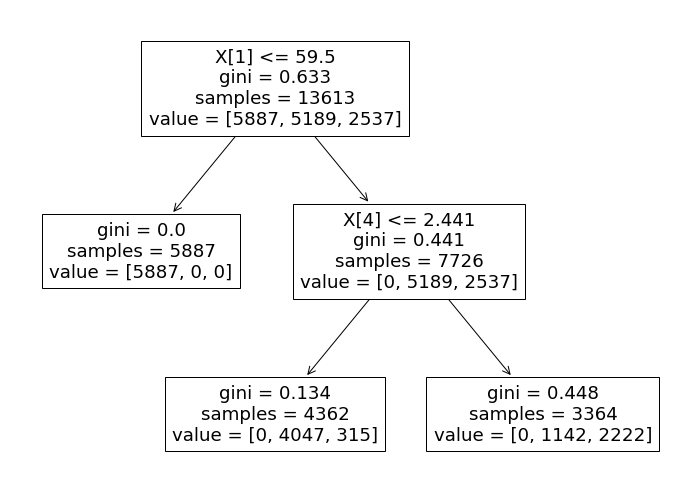

In [ ]:
# Visualize decision logic of decision tree model
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax= ax)
plt.show()

0.8989424206815512
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.92      0.80      0.86      1286
         2.0       0.68      0.86      0.76       630

    accuracy                           0.90      3404
   macro avg       0.87      0.89      0.87      3404
weighted avg       0.91      0.90      0.90      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


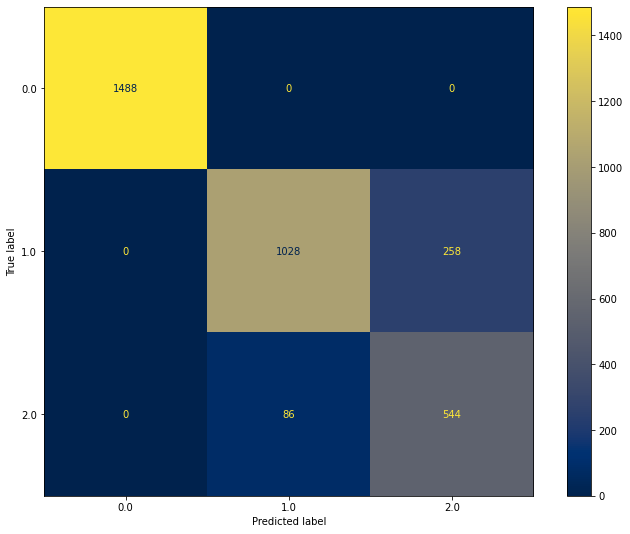

In [ ]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree_3_leaf, X_test, y_test, cmap ='cividis', ax=ax)

0.9579905992949471
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.94      0.94      1286
         2.0       0.88      0.89      0.89       630

    accuracy                           0.96      3404
   macro avg       0.94      0.94      0.94      3404
weighted avg       0.96      0.96      0.96      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


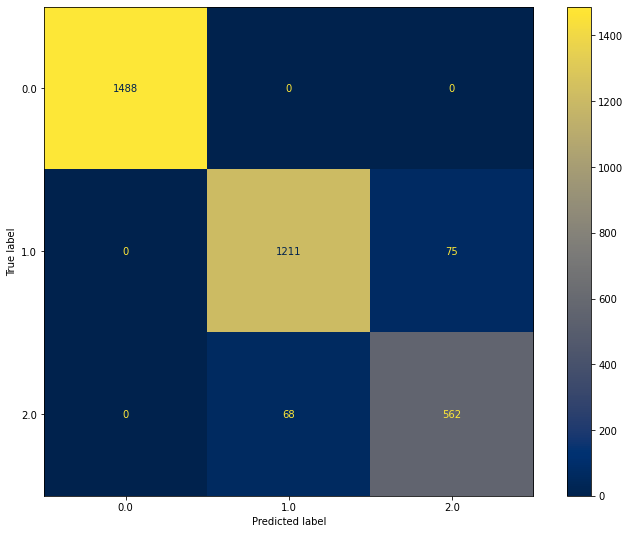

In [ ]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree, X_test, y_test, cmap ='cividis', ax=ax)

0.9694477085781433
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.89      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.95      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


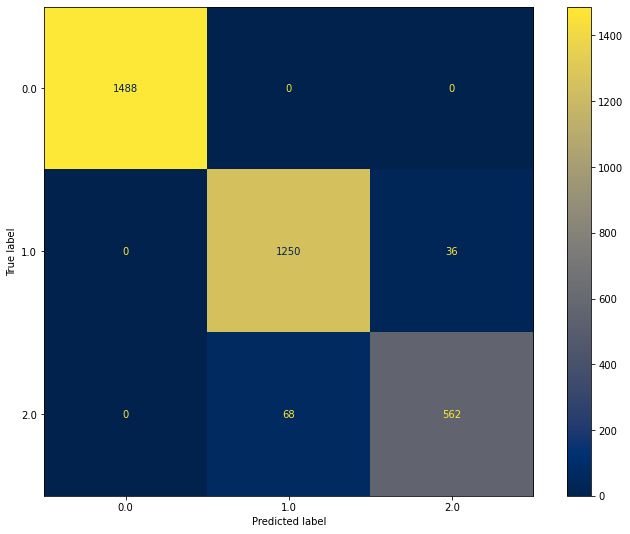

In [ ]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
rf.fit(X_train, y_train)

# Predict test data with trained model
y_predict = rf.predict(X_test)

# Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, X_test, y_test, cmap ='cividis', ax=ax)

runtime = 0.0250896733822707
tomatometer_rating = 0.564568127234653
audience_rating = 0.09189845392213032
audience_count = 0.06214472318700736
tomatometer_top_critics_count = 0.11852403584547389
G = 0.0011888040953558201
NC17 = 9.77147178464739e-05
NR = 0.022285414206711315
PG = 0.0017763209788921415
PG-13 = 0.004180667197940778
R = 0.003986998721665994
audience_status = 0.05853289797963547
count_PCA = 0.045726168530416646


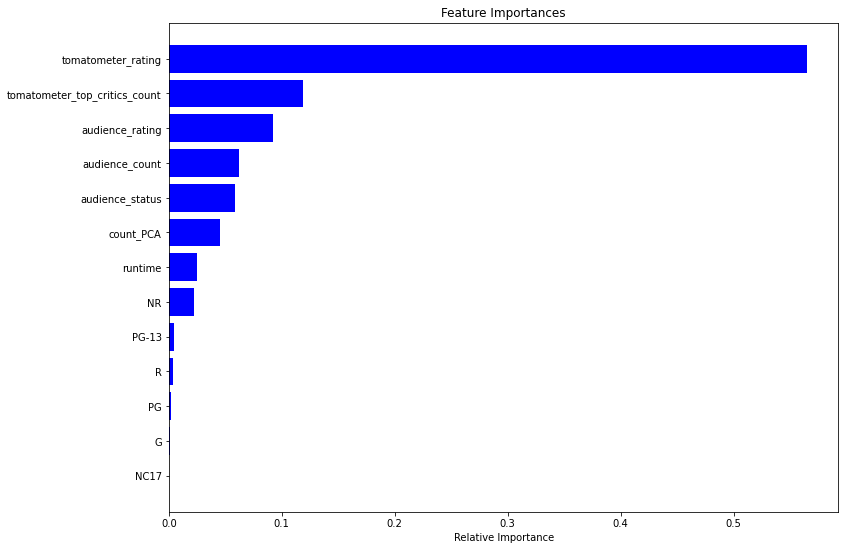

In [ ]:
# Get the fature importance
feature_importance = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Split data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


0.9706227967097533
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.90      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.96      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


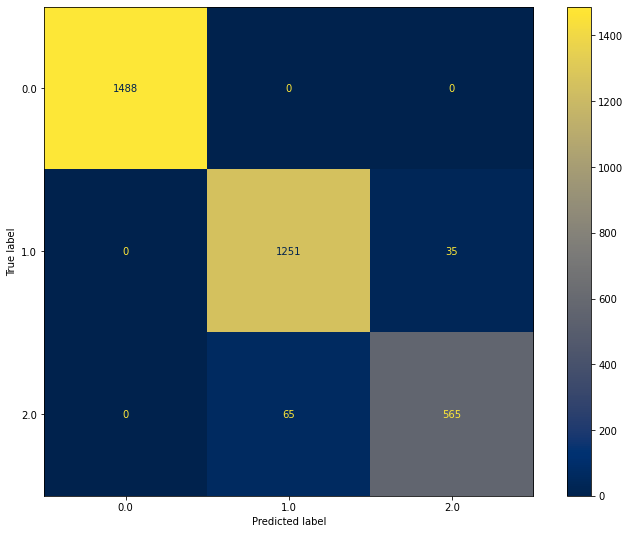

In [ ]:
# Initialize Random Forest class
rf = RandomForestClassifier(random_state=2)

# Train Random Forest on the training data after feature selection
rf.fit(X_train, y_train)

# Predict the traind model on the test data after feature selection
y_predict = rf.predict(X_test)

# Print the accuracy score and the classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, X_test, y_test, cmap ='cividis', ax=ax)

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

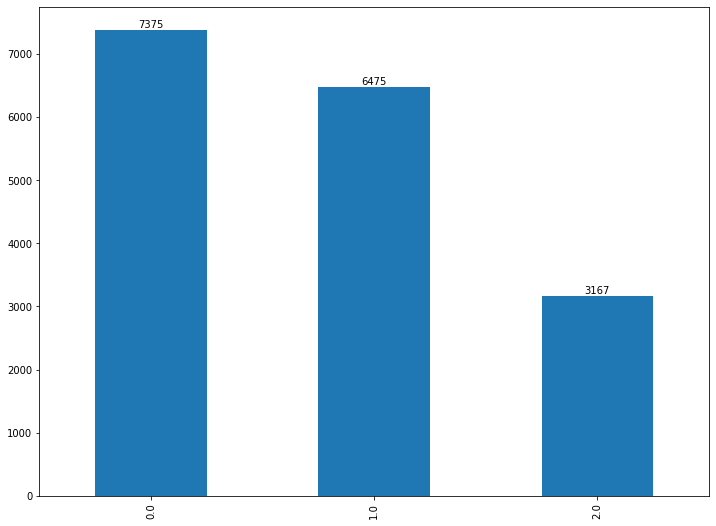

In [ ]:
# Check class distribution of target variable once more
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [ ]:
# Compute class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature.tomatometer_status), 
                      y = df_feature.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

0.9712103407755581
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.91      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.96      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


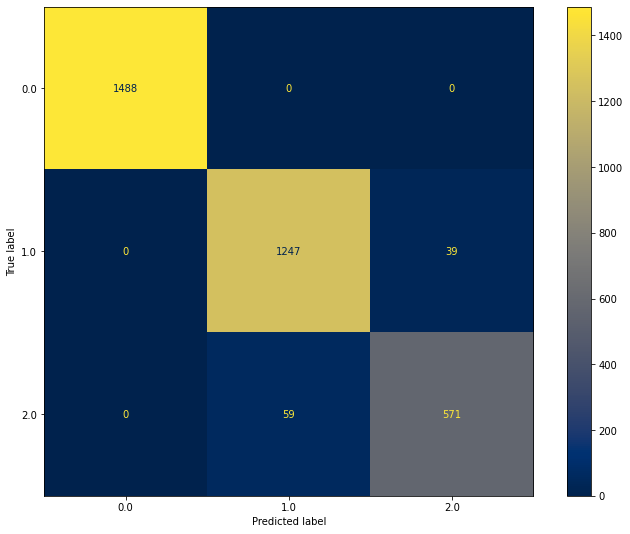

In [ ]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

#Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, X_test, y_test, cmap ='cividis', ax=ax)

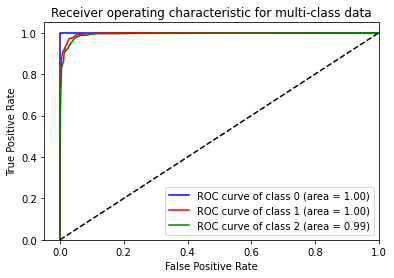

In [ ]:
# Initialize Random Forest model with weight information
y_score = rf_weighted.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

0.9712103407755581
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.91      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.96      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


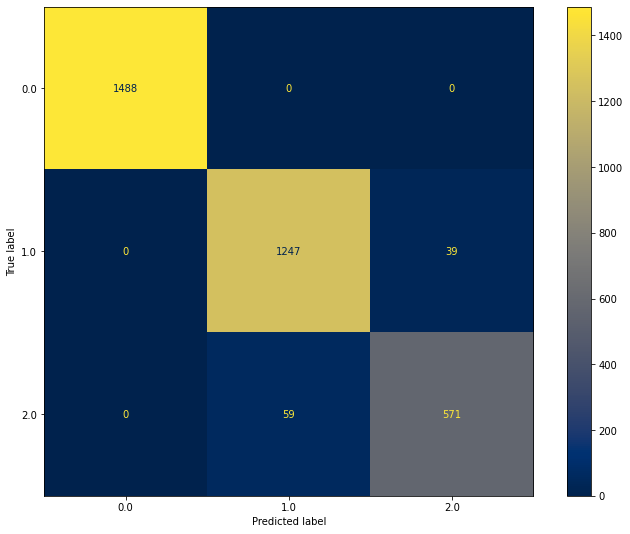

In [ ]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

#Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, X_test, y_test, cmap ='cividis', ax=ax)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_weighted, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 0.7691299435028248,
                                                                  1: 0.8760360360360361,
                                                                  2: 1.7910746237238186},
                                                    random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                  

In [ ]:
rf_random.best_params_
model = RandomForestClassifier()
model.set_params(**rf_random.best_params_)

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=5,
                       n_estimators=800)

0.9703290246768508
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.95      0.97      0.96      1286
         2.0       0.94      0.90      0.92       630

    accuracy                           0.97      3404
   macro avg       0.96      0.96      0.96      3404
weighted avg       0.97      0.97      0.97      3404



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


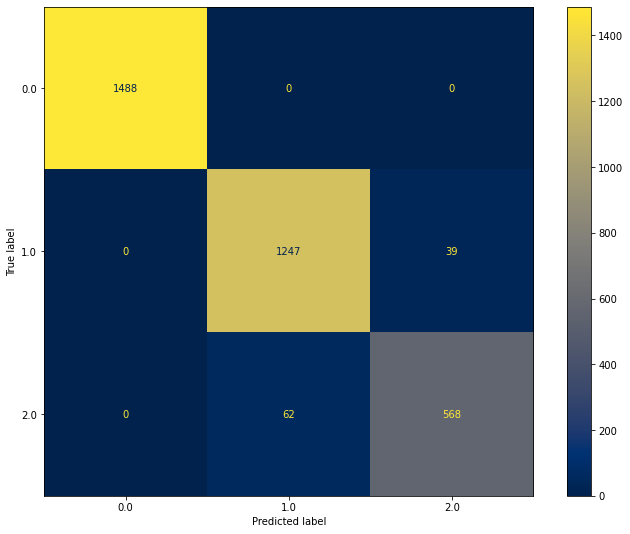

In [ ]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

#Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(model, X_test, y_test, cmap ='cividis', ax=ax)

second approach using sentiment 

In [ ]:
# Read critics dataframe
df_critics = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
# Merge critics dataframe with movie dataframe
df_merged = df_critics.merge(df_movie, how='inner', on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]

In [ ]:
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [ ]:
# Drop entries with missing reviews
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

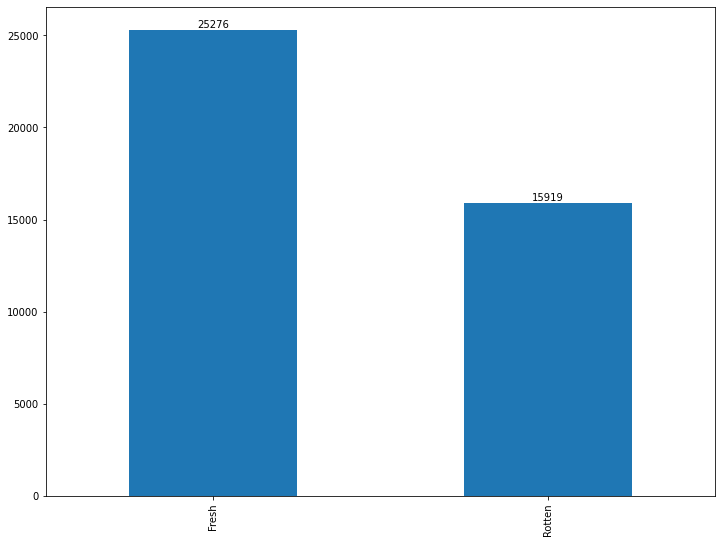

In [ ]:
# Plot distribution of the review
ax = df_merged.review_type.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [ ]:
# Pick only 5000 entries from the original dataset
df_sub = df_merged[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))

# Build final dataframe
df_feature_critics = pd.concat([df_sub[['review_content']]
                        ,review_type], axis=1).dropna()
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


In [ ]:
freq = pd.Series(' '.join(df_feature_critics['review_content']).split()).value_counts()

In [ ]:
freq

the            4511
a              3345
and            3136
of             3076
to             2178
               ... 
smugness          1
undermines        1
re-enacting       1
arch              1
happened.         1
Length: 20984, dtype: int64

In [ ]:
# Convert all words into lower cases
df_feature_critics['review_content'] = df_feature_critics['review_content'].str.lower()
df_feature_critics['review_content'].head()

0    a fantasy adventure that fuses greek mythology...
1    uma thurman as medusa, the gorgon with a coiff...
2    with a top-notch cast and dazzling special eff...
3    whether audiences will get behind the lightnin...
4    what's really lacking in the lightning thief i...
Name: review_content, dtype: object

In [ ]:
def dim():
  dimensions = len(set(df_feature_critics['review_content'].str.split().explode().values))
  print(f'{dimensions} dimensions in the potential DFM.')

dim()

19766 dimensions in the potential DFM.


In [ ]:
freq = pd.Series(' '.join(df_feature_critics['review_content']).split()).value_counts()
freq = pd.DataFrame(freq).reset_index()

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_feature_critics['review_content'] = df_feature_critics['review_content'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dim()

16732 dimensions in the potential DFM.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
custom_stop = ['thi','it\'','hi','ha','--','film','im','movi','wa']
stop.extend(custom_stop)
df_feature_critics['review_content'] = df_feature_critics['review_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
freq = pd.Series(' '.join(df_feature_critics['review_content']).split()).value_counts()[:20]
freq

like       390
one        379
make       310
much       207
stori      205
good       185
even       184
get        161
onli       161
charact    156
feel       150
look       147
perform    144
take       143
comedi     140
never      138
littl      137
may        136
time       135
best       132
dtype: int64

In [ ]:
df_feature_critics['review_content'] = df_feature_critics['review_content'].str.replace(r'[^\w\s]+', '')

<ipython-input-62-b617939606ff>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_feature_critics['review_content'] = df_feature_critics['review_content'].str.replace(r'[^\w\s]+', '')


In [ ]:
freq = pd.Series(' '.join(df_feature_critics['review_content']).split()).value_counts()
freq

one              431
like             398
make             314
much             217
good             215
                ... 
involving          1
babysitting        1
invigor            1
hedges             1
conscientious      1
Length: 12745, dtype: int64

In [ ]:

df_feature_critics['review_content'] = df_feature_critics['review_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

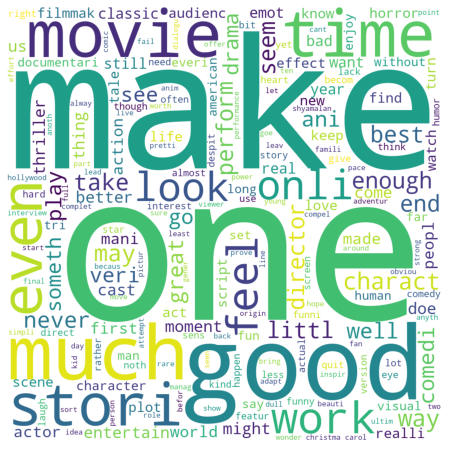

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
comment_words = str(' '.join(df_feature_critics['review_content']).split())

import string
comment_words = comment_words.translate(str.maketrans('','',string.punctuation))

wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          width=1000,height=1000,
                         ).generate(comment_words)
plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print(wordcloud)

In [ ]:
doc_complete = df_feature_critics['review_content']


doc_complete

0       fantasi adventur fuse greek mytholog contempor...
1       uma thurman medusa gorgon coiffur writh snake ...
2       topnotch cast dazzl special effects tide teen ...
3       whether audienc get behind lightn thief hard p...
4       realli lack lightn thief genuin sens wonder th...
                              ...                        
5290    though central mysteri doe hold one interest t...
5291    nice made slightli stodgi jewel heist flick of...
5292    flawless gimcrack genr exercise yet confid gam...
5293    flawless direct fine eye michael radford diamo...
5294    flawless fiction tale someth director michael ...
Name: review_content, Length: 5000, dtype: object

In [ ]:
corpus = [doc.split() for doc in doc_complete]

corpus

[['fantasi',
  'adventur',
  'fuse',
  'greek',
  'mytholog',
  'contemporari',
  'american',
  'place',
  'values',
  'anyon',
  'around',
  '15',
  'give',
  'take',
  'coupl',
  'years',
  'thrill',
  'visual',
  'spectacl'],
 ['uma',
  'thurman',
  'medusa',
  'gorgon',
  'coiffur',
  'writh',
  'snake',
  'stoneinduc',
  'hypnot',
  'gaze',
  'one',
  'highlight',
  'bewitch',
  'fantasi'],
 ['topnotch',
  'cast',
  'dazzl',
  'special',
  'effects',
  'tide',
  'teen',
  'next',
  'harri',
  'potter',
  'instalment'],
 ['whether',
  'audienc',
  'get',
  'behind',
  'lightn',
  'thief',
  'hard',
  'predict',
  'overall',
  'entertain',
  'introduct',
  'promis',
  'new',
  'world',
  'consum',
  'shadow',
  'potter',
  'big',
  'break',
  'free'],
 ['realli',
  'lack',
  'lightn',
  'thief',
  'genuin',
  'sens',
  'wonder',
  'thing',
  'bring',
  'viewer',
  'back',
  'hogwart'],
 ['list', 'ingredi', 'moviemag', 'potion', 'enjoy', 'start', 'finish'],
 ['harri',
  'potter',
  '

In [ ]:
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(corpus)

# Filter out extreme tokens
# Less than no_below documents (absolute number)
# More than no_above documents (fraction of total corpus size, not absolute number)
dictionary.filter_extremes(no_below=2, no_above=0.75)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
DFM = [dictionary.doc2bow(doc) for doc in corpus]

In [ ]:
print(DFM)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(6, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(32, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(46, 1), (52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1)], [(30, 1), (32, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(9, 1), (10, 1), (23, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)], [(87, 1), (88, 1), (89, 1)], [(31, 1), (39, 1), (62, 1), (71, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (9

In [ ]:
len(DFM)

5000

In [ ]:
print(dictionary.token2id)

{'adventur': 0, 'american': 1, 'anyon': 2, 'around': 3, 'contemporari': 4, 'coupl': 5, 'fantasi': 6, 'fuse': 7, 'give': 8, 'greek': 9, 'mytholog': 10, 'place': 11, 'spectacl': 12, 'take': 13, 'thrill': 14, 'values': 15, 'visual': 16, 'years': 17, 'bewitch': 18, 'coiffur': 19, 'gaze': 20, 'highlight': 21, 'medusa': 22, 'one': 23, 'snake': 24, 'thurman': 25, 'uma': 26, 'cast': 27, 'dazzl': 28, 'effects': 29, 'harri': 30, 'next': 31, 'potter': 32, 'special': 33, 'teen': 34, 'topnotch': 35, 'audienc': 36, 'behind': 37, 'big': 38, 'break': 39, 'consum': 40, 'entertain': 41, 'free': 42, 'get': 43, 'hard': 44, 'introduct': 45, 'lightn': 46, 'new': 47, 'overall': 48, 'predict': 49, 'promis': 50, 'shadow': 51, 'thief': 52, 'whether': 53, 'world': 54, 'back': 55, 'bring': 56, 'genuin': 57, 'hogwart': 58, 'lack': 59, 'realli': 60, 'sens': 61, 'thing': 62, 'viewer': 63, 'wonder': 64, 'enjoy': 65, 'finish': 66, 'ingredi': 67, 'list': 68, 'start': 69, 'chri': 70, 'columbus': 71, 'come': 72, 'direct'

In [ ]:
len(dictionary.token2id)

5711

In [ ]:
from gensim.similarities import MatrixSimilarity
simil = MatrixSimilarity(DFM, num_features=len(dictionary))
distance = 1 - simil[DFM]

In [ ]:
text_sim = pd.DataFrame(simil[DFM])
text_sim[76].sort_values(ascending = False)

76      1.000000
4286    0.272166
4318    0.258199
3718    0.235702
4324    0.235702
          ...   
1724    0.000000
1723    0.000000
1722    0.000000
1721    0.000000
4999    0.000000
Name: 76, Length: 5000, dtype: float32

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count=20,size= 40,workers=3, window =3, sg = 1)

In [ ]:
n_topics = 4
ldamodel = models.LdaModel(DFM, num_topics=n_topics,id2word = dictionary, passes=40)

In [ ]:
print(ldamodel.print_topics(num_topics=n_topics, num_words=8))

[(0, '0.013*"run" + 0.009*"make" + 0.008*"like" + 0.007*"movie" + 0.006*"one" + 0.006*"enough" + 0.006*"take" + 0.005*"good"'), (1, '0.007*"one" + 0.006*"stori" + 0.006*"way" + 0.006*"like" + 0.006*"even" + 0.005*"time" + 0.005*"perform" + 0.005*"cast"'), (2, '0.008*"like" + 0.008*"horror" + 0.006*"make" + 0.005*"stori" + 0.005*"thing" + 0.005*"one" + 0.005*"well" + 0.004*"feel"'), (3, '0.012*"one" + 0.006*"best" + 0.005*"comedi" + 0.005*"like" + 0.005*"good" + 0.005*"drama" + 0.005*"man" + 0.004*"onli"')]


In [ ]:
!pip install pyLDAvis

import pyLDAvis
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 28.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=36b3156a7d48b32ba2990b2bd2650aa727635645aa245619b7bd0ba18b511f7a
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8af023ac21096efb043a62251fa7b5b7d72a56c8ba0b00f8c5fa4c9f90ee9f55
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(ldamodel, DFM, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.142756 -0.068664       1        1  26.557866
0     -0.004021 -0.086871       2        1  24.949075
1     -0.026077  0.186177       3        1  24.395717
2      0.172854 -0.030642       4        1  24.097342, topic_info=        Term        Freq       Total Category  logprob  loglift
204      run  172.000000  172.000000  Default  30.0000  30.0000
2237  horror  102.000000  102.000000  Default  29.0000  29.0000
2524     war   52.000000   52.000000  Default  28.0000  28.0000
575    drama  118.000000  118.000000  Default  27.0000  27.0000
422      way  130.000000  130.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
105      ani   40.643610  105.687896   Topic4  -5.7418   0.4674
23       one   61.593448  405.144412   Topic4  -5.3261  -0.4606
156      end   41.079348  119.551820   Topic4  -5.7311   0.3548
422      way   39.626535  130.838584   Topic4  -5.7671   0.2286
571      see   38.571238  111.552147   Topic4  -5.7941   0.3611

[289 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
309       2  0.105783    action
309       3  0.409908    action
309       4  0.476023    action
889       1  0.982676   actress
0         1  0.138371  adventur
...     ...       ...       ...
1090      2  0.966338     wrong
865       1  0.711856       yet
865       3  0.112398       yet
865       4  0.174842       yet
2599      1  0.977076      youv

[443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [ ]:
tfidf = models.TfidfModel(DFM)
DFM_tfidf = tfidf[DFM]

n_SVD = 10
SVD_model = models.LsiModel(DFM_tfidf,
                            id2word=dictionary,
                            num_topics=n_SVD)

SVD=SVD_model[DFM_tfidf]


In [ ]:
svd_array = gensim.matutils.corpus2csc(SVD).T.toarray()

# Convert the results into data frame
svd_df = pd.DataFrame(svd_array)

# Show SVD results: reduced vector representation of the text documents
svd_df

,0,1,2,3,4,5,6,7,8,9
0,-0.093442,0.021048,-0.009018,-0.039389,0.016039,0.020193,-0.007394,-0.008066,0.024377,-0.062020
1,-0.039178,-0.070880,0.040071,0.004375,-0.042148,-0.002856,0.004926,-0.003975,0.018289,-0.035162
2,-0.049148,0.005154,-0.017272,0.004424,0.009418,-0.066866,-0.011290,0.004859,0.026121,-0.048104
3,-0.095469,0.016119,-0.022593,-0.012485,0.002258,0.012123,-0.015563,0.008072,0.036216,-0.004840
4,-0.096026,0.020192,-0.016383,-0.025931,0.010329,-0.013212,-0.014712,0.044826,0.047088,-0.017918
...,...,...,...,...,...,...,...,...,...,...
4995,-0.113146,-0.085169,0.005581,-0.014740,-0.017986,-0.059130,0.029176,0.022051,-0.031292,0.032023
4996,-0.107611,-0.082015,0.024086,-0.019176,-0.059154,-0.052743,0.007151,0.020240,-0.002764,0.001089
4997,-0.091252,-0.019983,0.017517,-0.015605,0.005513,-0.057639,0.004726,0.026407,-0.000983,0.081196
4998,-0.086415,0.018667,-0.021918,0.003799,0.021894,-0.057748,0.006528,0.049310,0.001436,-0.016054


In [ ]:


# Pick only 5000 entries from the original dataset
df_sub = df_merged[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))

# Build final dataframe
df_feature_c = pd.concat([df_sub[['review_content','movie_title']]
                        ,review_type], axis=1).dropna()

df_feature_critics1 = pd.concat([svd_df,df_feature_c],axis=1).dropna()

In [ ]:
df_sub

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten
...,...,...,...,...,...
5290,m/10008754-flawless,Flawless,Though the central mystery does hold one's int...,Rotten,Rotten
5291,m/10008754-flawless,Flawless,A nicely made if slightly stodgy jewel heist f...,Fresh,Rotten
5292,m/10008754-flawless,Flawless,"Flawless is a gimcrack, a genre exercise, yet ...",Fresh,Rotten
5293,m/10008754-flawless,Flawless,"Flawless, directed with a fine eye by Michael ...",Fresh,Rotten


In [ ]:
df_feature_critics1 


,0,1,2,3,4,5,6,7,8,9,review_content,movie_title,review_type
0,-0.093442,0.021048,-0.009018,-0.039389,0.016039,0.020193,-0.007394,-0.008066,0.024377,-0.062020,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,1.0
1,-0.039178,-0.070880,0.040071,0.004375,-0.042148,-0.002856,0.004926,-0.003975,0.018289,-0.035162,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,1.0
2,-0.049148,0.005154,-0.017272,0.004424,0.009418,-0.066866,-0.011290,0.004859,0.026121,-0.048104,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,1.0
3,-0.095469,0.016119,-0.022593,-0.012485,0.002258,0.012123,-0.015563,0.008072,0.036216,-0.004840,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,1.0
4,-0.096026,0.020192,-0.016383,-0.025931,0.010329,-0.013212,-0.014712,0.044826,0.047088,-0.017918,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.064937,0.027288,-0.002512,-0.003445,-0.007840,-0.025972,0.025529,0.023106,0.009917,-0.013267,Although the film is very much in the Morgan S...,King Corn,1.0
4995,-0.113146,-0.085169,0.005581,-0.014740,-0.017986,-0.059130,0.029176,0.022051,-0.031292,0.032023,"This smart, amiable documentary is about corn:...",King Corn,1.0
4997,-0.091252,-0.019983,0.017517,-0.015605,0.005513,-0.057639,0.004726,0.026407,-0.000983,0.081196,Sure to inspire debate in France and Germany a...,L' Avocat de la Terreur (Terror's Advocate),1.0
4998,-0.086415,0.018667,-0.021918,0.003799,0.021894,-0.057748,0.006528,0.049310,0.001436,-0.016054,"Schroeder's docu offers a chilly, poignant loo...",L' Avocat de la Terreur (Terror's Advocate),1.0


In [ ]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df_feature_critics1.drop(columns=['review_type','review_content','movie_title']), df_feature_critics1['review_type'], test_size=0.2, random_state=42)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9
1679,-0.055094,-0.002389,-0.020423,-0.017394,-0.005139,-0.056960,0.001714,0.025376,-0.010244,0.026088
2251,-0.066359,0.002992,-0.022029,0.018166,-0.002630,-0.036525,0.016857,-0.011171,0.013776,-0.042644
73,-0.066049,0.057371,0.099453,0.037668,0.021860,-0.031284,-0.001329,-0.017060,-0.017828,-0.016800
4630,-0.133622,-0.029572,0.120839,0.004244,-0.015485,-0.010835,-0.003467,-0.017722,-0.002860,0.139537
4467,-0.058542,0.103157,-0.094826,0.075302,-0.259958,0.078319,-0.106806,-0.061227,-0.018602,0.026668
...,...,...,...,...,...,...,...,...,...,...
4694,-0.036168,-0.016402,-0.004088,-0.006461,-0.020140,-0.020438,-0.006010,0.025051,0.002174,-0.011417
493,-0.137078,0.046313,0.073499,0.079838,0.066984,0.073040,-0.085979,0.053211,0.040292,0.011249
3317,-0.133084,0.080284,0.093865,0.040535,0.020227,-0.017384,0.003590,0.036329,-0.002682,0.034425
4023,-0.061235,-0.078969,0.038676,0.008467,-0.036830,0.003997,0.003019,-0.016086,-0.000162,-0.022750


              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48       465
         1.0       0.51      0.56      0.53       480

    accuracy                           0.51       945
   macro avg       0.51      0.51      0.51       945
weighted avg       0.51      0.51      0.51       945



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


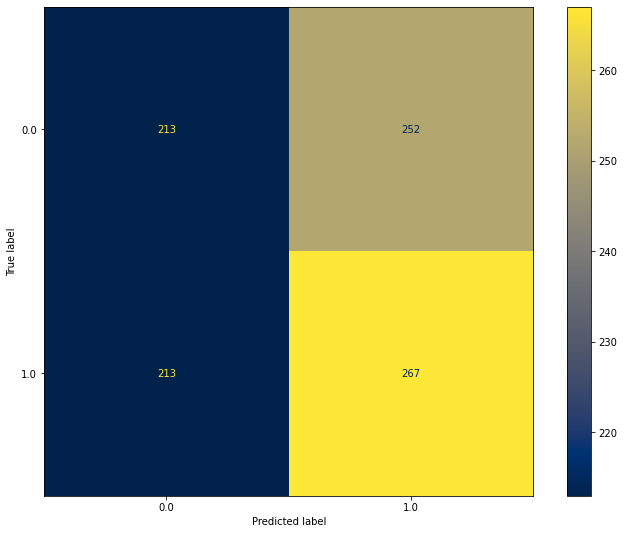

In [ ]:
# Instantiate vectorizer class
#vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
#X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)

# Predict and output classification report
y_predicted = rf.predict(X_test)

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, X_test, y_test, cmap ='cividis', ax=ax)

In [ ]:
# Calculate class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature_critics1.review_type), 
                      y = df_feature_critics1.review_type.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict


{0: 1.0472493345164153, 1: 0.956830158086745}

              precision    recall  f1-score   support

         0.0       0.51      0.46      0.48       465
         1.0       0.52      0.58      0.55       480

    accuracy                           0.52       945
   macro avg       0.52      0.52      0.52       945
weighted avg       0.52      0.52      0.52       945



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


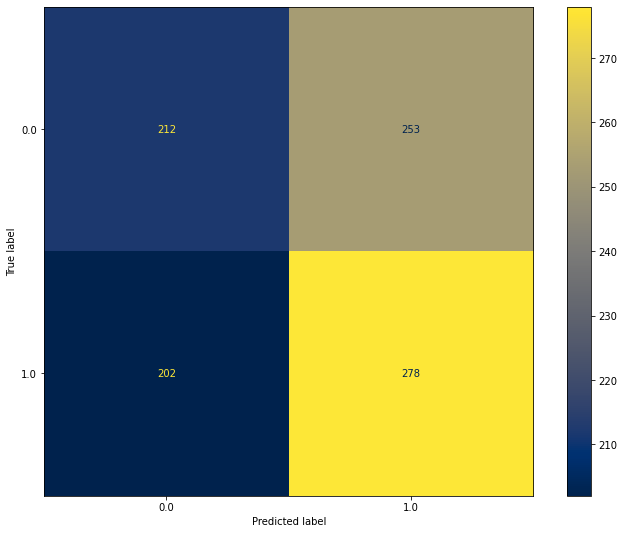

In [ ]:
# Instantiate vectorizer class
#vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
#X_train_vec = vectorizer.fit_transform(X_train)

# Initialize random forest and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train, y_train)

# Predict and output classification report
y_predicted = rf_weighted.predict(X_test)

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, X_test, y_test, cmap ='cividis', ax=ax)

In [ ]:
# Define a function to predict movie status based on the overall sentiment
def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum()/len(prediction)*100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

In [ ]:
df_feature_critics1['movie_title'][df_feature_critics1['movie_title'].astype('str').str.len()<=10][:200]

291            10
292            10
295            10
297            10
299            10
          ...    
1005    Deep Blue
1006    Deep Blue
1007    Deep Blue
1008    Deep Blue
1009    Deep Blue
Name: movie_title, Length: 200, dtype: object

In [ ]:

df_bol = df_feature_critics1.loc[df_feature_critics1['movie_title'] == 'King Corn']
df_bol.head()

,0,1,2,3,4,5,6,7,8,9,review_content,movie_title,review_type
4970,-0.047187,-0.004990,-0.001281,-0.002391,0.011039,0.001823,-0.008091,0.021622,0.012245,0.039409,This is as much a thoughtful meditation on the...,King Corn,1.0
4971,-0.097354,-0.010224,-0.060323,0.098614,0.076558,0.006598,-0.053448,-0.081739,0.089315,-0.053318,A deceptively intelligent new entry in the reg...,King Corn,1.0
4972,-0.088299,0.008082,-0.023135,-0.032437,0.020002,0.004037,-0.002921,0.043974,0.070130,-0.004397,An entertaining look at the flagship of Americ...,King Corn,1.0
4973,-0.092247,-0.032074,-0.024458,0.054854,0.043706,0.024747,0.022300,0.089263,-0.084005,0.009538,"Well, it's certainly one of the less blatantly...",King Corn,1.0
4974,-0.049635,-0.027902,0.013619,0.012597,-0.009267,-0.013094,0.007454,0.008160,0.004080,0.022941,"Sometimes obvious, but at other times quite st...",King Corn,1.0


In [ ]:
# Get the prediction
X_bol=df_feature_critics1.drop(columns=['review_type','review_content','movie_title'])
X_bol=X_bol.loc[df_merged['movie_title'] == 'King Corn']
X_bol

,0,1,2,3,4,5,6,7,8,9
4970,-0.047187,-0.004990,-0.001281,-0.002391,0.011039,0.001823,-0.008091,0.021622,0.012245,0.039409
4971,-0.097354,-0.010224,-0.060323,0.098614,0.076558,0.006598,-0.053448,-0.081739,0.089315,-0.053318
4972,-0.088299,0.008082,-0.023135,-0.032437,0.020002,0.004037,-0.002921,0.043974,0.070130,-0.004397
4973,-0.092247,-0.032074,-0.024458,0.054854,0.043706,0.024747,0.022300,0.089263,-0.084005,0.009538
4974,-0.049635,-0.027902,0.013619,0.012597,-0.009267,-0.013094,0.007454,0.008160,0.004080,0.022941
4975,-0.132638,-0.055780,-0.123281,0.149375,0.168207,-0.062501,-0.188267,-0.061016,0.085572,0.051258
4976,-0.144747,-0.009464,0.064842,-0.003995,-0.036742,-0.029520,0.030100,-0.004710,0.042335,0.028513
4977,-0.067503,0.014414,-0.018777,0.000202,0.004517,-0.045193,-0.002374,0.028835,-0.003529,-0.004155
4978,-0.065042,-0.001917,-0.001233,-0.011903,0.017291,-0.007209,0.014191,0.010661,0.007739,-0.031524
4979,-0.111512,-0.095306,-0.008863,0.035411,0.019055,0.006622,-0.029797,-0.047167,0.036065,0.016278


In [ ]:
# Get the prediction
y_predicted_bol = rf_weighted.predict(X_bol)
predict_movie_status(y_predicted_bol)

Positive review:91.30%
Movie status: Fresh


In [ ]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'King Corn'].unique()

array(['Fresh'], dtype=object)

In [ ]:
# Gather all of the reviews of Angel Heart movie


df_cri = df_feature_critics1.loc[df_feature_critics1['movie_title'] == 'Criminal']
df_cri.head()


,0,1,2,3,4,5,6,7,8,9,review_content,movie_title,review_type
845,-0.089865,0.034919,0.001976,-0.006568,0.015257,0.021169,0.006819,0.020647,0.093724,0.011778,We got two and a half more months of crap to g...,Criminal,0.0
846,-0.057952,-0.004663,-0.023539,0.007045,0.012448,-0.046163,0.002818,0.032011,-0.038529,-0.024889,"Produced by Soderbergh, Criminal bears an unca...",Criminal,0.0
847,-0.034728,-0.000813,0.001686,-0.001391,0.005900,-0.016273,0.008529,0.000813,-0.001497,0.005059,The movie was made just four years ago by Arge...,Criminal,0.0
848,-0.094191,0.012615,-0.019201,-0.033293,-0.009275,-0.019134,-0.004159,0.044778,0.003569,0.027592,Criminal's biggest offense may be that Jacobs ...,Criminal,0.0
849,-0.055116,-0.000161,-0.031315,-0.027581,-0.001023,-0.045990,-0.034546,0.013699,-0.028267,-0.011743,[Full of] fine acting and sharp dialog.,Criminal,1.0


In [ ]:
X_cri=df_feature_critics1.drop(columns=['review_type','review_content','movie_title'])
X_cri=X_cri.loc[df_merged['movie_title'] == 'Criminal']
X_cri

,0,1,2,3,4,5,6,7,8,9
845,-0.089865,0.034919,0.001976,-0.006568,0.015257,0.021169,0.006819,0.020647,0.093724,0.011778
846,-0.057952,-0.004663,-0.023539,0.007045,0.012448,-0.046163,0.002818,0.032011,-0.038529,-0.024889
847,-0.034728,-0.000813,0.001686,-0.001391,0.005900,-0.016273,0.008529,0.000813,-0.001497,0.005059
848,-0.094191,0.012615,-0.019201,-0.033293,-0.009275,-0.019134,-0.004159,0.044778,0.003569,0.027592
849,-0.055116,-0.000161,-0.031315,-0.027581,-0.001023,-0.045990,-0.034546,0.013699,-0.028267,-0.011743
...,...,...,...,...,...,...,...,...,...,...
962,-0.070180,-0.020807,0.022912,-0.007955,0.000231,-0.009413,0.025587,-0.005182,0.025383,0.035537
965,-0.155643,-0.274235,0.107587,-0.032938,-0.109358,-0.012285,-0.038725,-0.098837,0.015981,-0.081321
966,-0.045631,0.008265,-0.015822,0.018164,0.021489,0.018841,-0.003230,-0.029228,0.025410,-0.074734
967,-0.052729,-0.021895,0.001847,-0.027007,0.012717,-0.003954,-0.019345,-0.025285,0.001073,-0.046364


In [ ]:
# Get the prediction
y_predicted_Cri = rf_weighted.predict(X_cri)
predict_movie_status(y_predicted_Cri)

Positive review:68.10%
Movie status: Fresh


In [ ]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Criminal'].unique()

array(['Fresh'], dtype=object)

In [ ]:
# Gather all of the reviews of The Duchess movie 
df_blue = df_feature_critics1.loc[df_feature_critics1['movie_title'] == 'Deep Blue']
df_blue.head()

,0,1,2,3,4,5,6,7,8,9,review_content,movie_title,review_type
974,-0.037647,-0.025024,0.012883,-0.089241,0.018785,0.042395,-0.038593,-0.025296,-0.040831,-0.044403,"A nice piece of work, but unfortunately it sma...",Deep Blue,1.0
975,-0.019877,-0.012991,0.007408,-0.005056,-0.002803,-0.009397,0.000767,-0.003765,-0.014867,-0.014566,"...if you want to have a majestically scored, ...",Deep Blue,1.0
976,-0.111040,0.181175,0.294866,0.102689,0.045788,-0.004299,-0.040734,-0.061587,-0.088593,0.036601,The filmmakers startlingly bring to life the b...,Deep Blue,1.0
977,-0.051897,-0.069056,0.012871,-0.033030,-0.002999,-0.051340,0.031143,-0.062305,-0.015585,0.088178,Taking us from God's-eye-views of the sparklin...,Deep Blue,1.0
978,-0.104738,-0.127662,0.025395,-0.012211,-0.018158,-0.065016,0.004858,-0.098988,-0.020324,0.011031,The big screen adds extra impact to inspiring ...,Deep Blue,1.0


In [ ]:


X_blue=df_feature_critics1.drop(columns=['review_type','review_content','movie_title'])
X_blue=X_blue.loc[df_merged['movie_title'] == 'Criminal']
X_blue

,0,1,2,3,4,5,6,7,8,9
845,-0.089865,0.034919,0.001976,-0.006568,0.015257,0.021169,0.006819,0.020647,0.093724,0.011778
846,-0.057952,-0.004663,-0.023539,0.007045,0.012448,-0.046163,0.002818,0.032011,-0.038529,-0.024889
847,-0.034728,-0.000813,0.001686,-0.001391,0.005900,-0.016273,0.008529,0.000813,-0.001497,0.005059
848,-0.094191,0.012615,-0.019201,-0.033293,-0.009275,-0.019134,-0.004159,0.044778,0.003569,0.027592
849,-0.055116,-0.000161,-0.031315,-0.027581,-0.001023,-0.045990,-0.034546,0.013699,-0.028267,-0.011743
...,...,...,...,...,...,...,...,...,...,...
962,-0.070180,-0.020807,0.022912,-0.007955,0.000231,-0.009413,0.025587,-0.005182,0.025383,0.035537
965,-0.155643,-0.274235,0.107587,-0.032938,-0.109358,-0.012285,-0.038725,-0.098837,0.015981,-0.081321
966,-0.045631,0.008265,-0.015822,0.018164,0.021489,0.018841,-0.003230,-0.029228,0.025410,-0.074734
967,-0.052729,-0.021895,0.001847,-0.027007,0.012717,-0.003954,-0.019345,-0.025285,0.001073,-0.046364


In [ ]:
# Get the prediction
y_predicted_blue = rf_weighted.predict(X_blue)
predict_movie_status(y_predicted_blue)


Positive review:68.10%
Movie status: Fresh


In [ ]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Deep Blue'].unique()

array(['Fresh'], dtype=object)